# **Understanding the Data**

This data are from Lending Club, a marketplace for connecting borrowers to investors. Each borrower fills a comprehensive form, to provide his financial history, and Lending Club evaluates these applications and decide which of them will be accepted. Additionally, it determines an interest rate for each borrower and a credit score as well.

Invistors can see the accepted applications, thier credit scores, and interset rates. Once an invister decide to fund a loan.

# Examining the Dataset

The data folder contains two files, the approved and declined loans in addition to a data dictionary which contains information about columns' names.

### Importing some libraries:

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
sns.set_style("darkgrid") # for presentation with dark theme only
#plt.style.use('dark_background') # for presentation with dark theme only

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading the data into a pandas dataframe

Kindly follow these steps to access the data files:

1. From the left panel, select Files -> mount Drive and grant access to this notebook to modify files on your google drive.
2. Navigate to the data folder (directory) that contains your data.
3. Click the three dots next to the folder name and copy its path.
4. Paste the path to data_folder.

In [ ]:
data_folder = '/content/drive/My Drive/Colab Notebooks/dataEng/data/'
# skip row 1 so pandas can parse the data properly.
loans_2007 = pd.read_csv(data_folder + 'lending_club_loans.csv', skiprows=1, low_memory=False)
half_count = len(loans_2007) / 2
loans_2007 = loans_2007.dropna(thresh=half_count,axis=1) # Drop any column with more than 50% missing values
loans_2007 = loans_2007.drop(['url','desc'],axis=1) # These columns are not useful for our purposes

In [ ]:
# display the header of the loans2007


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-2015,171.62,Sep-2016,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,Sep-2016,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-2014,649.91,Sep-2016,719.0,715.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [ ]:
# print the shape loans2007


(42538, 56)

# Understanding and clearning the data columns:

In [ ]:
data_dictionary = pd.read_csv(data_folder + 'LCDataDictionary.csv') # Loading in the data dictionary
print(data_dictionary.shape[0])
print(data_dictionary.columns.tolist())

117
['LoanStatNew', 'Description']


In [ ]:
# let's have a look over the data_dictionary header. It is also a pandas dataframe


,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.


In [ ]:
# It is more informative to change the columns' names to be as follows:
# LoanStatNew -> name
# Description -> description (since python developers usually preferes snake_case style)


### Creating a dataframe which provides some meta-data to understand the columns of dataframe

In [ ]:
loans_2007_dtypes = pd.DataFrame(loans_2007.dtypes,columns=['dtypes'])
loans_2007_dtypes = loans_2007_dtypes.reset_index()
loans_2007_dtypes['name'] = loans_2007_dtypes['index']
loans_2007_dtypes.head()

,index,dtypes,name
0,id,object,id
1,member_id,float64,member_id
2,loan_amnt,float64,loan_amnt
3,funded_amnt,float64,funded_amnt
4,funded_amnt_inv,float64,funded_amnt_inv


In [ ]:
# Select only the columns 'name' and 'dtypes' to be kept in the loans_2007_dtypes df.

# add a new column named 'first value' to loans_2007_dtypes that holds the first value of each feature (column)

# Apply a left join (merge) between loans_2007_dtypes and data_dictionary on 'name' column. Name the new df as 'preview'

# print the header of preivew

,name,dtypes,first value,description
0,id,object,1077501,A unique LC assigned ID for the loan listing.
1,member_id,float64,1.2966e+06,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,5000,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,float64,5000,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,4975,The total amount committed by investors for that loan at that point in time.


It can be cumbersome to try to explore all the rows of a preview at once, so instead we’ll break it up into three parts and look at smaller selection of features each time. As we explore the features to better understand each of them, we’ll want to pay attention to any column that:



* leaks information from the future (after the loan has already been funded),
* doesn’t affect the borrower’s ability to pay back the loan (e.g. a randomly generated ID value by Lending Club),
* is formatted poorly,
* requires more data or a lot of pre-processing to turn into useful a feature, or
* contains redundant information.

These are all things we’ll want to be careful about, since handling them incorrectly will hurt our analysis in the long run.

### Groups of columns:

In [ ]:
preview[:19]

,name,dtypes,first value,description
0,id,object,1077501,A unique LC assigned ID for the loan listing.
1,member_id,float64,1.2966e+06,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,5000,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,float64,5000,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,4975,The total amount committed by investors for that loan at that point in time.
5,term,object,36 months,The number of payments on the loan. Values are in months and can be either 36 or 60.
6,int_rate,object,10.65%,Interest Rate on the loan
7,installment,float64,162.87,The monthly payment owed by the borrower if the loan originates.
8,grade,object,B,LC assigned loan grade
9,sub_grade,object,B2,LC assigned loan subgrade


Which of these features should be droped based on the previous creteria? and why?

* .. 
* .. 
...

In [ ]:
# Drop the features that you stated


loans_2007 = loans_2007.drop(drop_list,axis=1)

In [ ]:
preview[19:38]

,name,dtypes,first value,description
19,title,object,Computer,The loan title provided by the borrower
20,zip_code,object,860xx,The first 3 numbers of the zip code provided by the borrower in the loan application.
21,addr_state,object,AZ,The state provided by the borrower in the loan application
22,dti,float64,27.65,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
23,delinq_2yrs,float64,0,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
24,earliest_cr_line,object,Jan-1985,The month the borrower's earliest reported credit line was opened
25,fico_range_low,float64,735,The lower boundary range the borrower’s FICO at loan origination belongs to.
26,fico_range_high,float64,739,The upper boundary range the borrower’s FICO at loan origination belongs to.
27,inq_last_6mths,float64,1,The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
28,open_acc,float64,3,The number of open credit lines in the borrower's credit file.


Again, Which of these features should be droped based on the previous creteria? and why?

* .. 
* .. 
...

In [ ]:
# # Drop the features that you stated

loans_2007 = loans_2007.drop(drop_cols, axis=1)

In [ ]:
preview[38:]

,name,dtypes,first value,description
38,total_rec_prncp,float64,5000,Principal received to date
39,total_rec_int,float64,863.16,Interest received to date
40,total_rec_late_fee,float64,0,Late fees received to date
41,recoveries,float64,0,post charge off gross recovery
42,collection_recovery_fee,float64,0,post charge off collection fee
43,last_pymnt_d,object,Jan-2015,Last month payment was received
44,last_pymnt_amnt,float64,171.62,Last total payment amount received
45,last_credit_pull_d,object,Sep-2016,The most recent month LC pulled credit for this loan
46,last_fico_range_high,float64,744,The upper boundary range the borrower’s last FICO pulled belongs to.
47,last_fico_range_low,float64,740,The lower boundary range the borrower’s last FICO pulled belongs to.


Finally, Which of these features should be droped based on the previous creteria? and why?

* .. 
* .. 
...

In [ ]:
# Drop them here

loans_2007 = loans_2007.drop(drop_cols, axis=1)

## Investigating FICO Score Columns
It’s worth taking a moment to discuss the fico_range_low, `fico_range_high`, `last_fico_range_low`, and `last_fico_range_high` columns.

FICO scores are a credit score: a number used by banks and credit cards to represent how credit-worthy a person is. While there are a few types of credit scores used in the United States, the FICO score is the best known and most widely used.

When a borrower applies for a loan, LendingClub gets the borrower’s credit score from FICO — they are given a lower and upper limit of the range that the borrowers score belongs to, and they store those values as `fico_range_low`, `fico_range_high`. After that, any updates to the borrowers score are recorded as `last_fico_range_low`, and `last_fico_range_high`.

A key part of any data science project is to do everything you can to understand the data. While researching this particular data set, I found a project from 2014 by a group of students from Stanford University. In the report for the project, the group listed the current credit score (last_fico_range) among late fees and recovery fees as fields they mistakenly added to the features, but state that they later learned these columns all leak information from the future.

However, following this group’s project, another group from Stanford worked on this same Lending Club dataset. They used the FICO score columns, dropping only `last_fico_range_low`, in their modeling. This second group’s report described `last_fico_range_high` as the one of the more important features in predicting accurate results.

With this information, the question we must answer is: do the FICO credit scores leak information from the future? Recall a column is considered to leak information when the data it contains won’t be available when we use our model to make predictions — in this case when we use our model on future loan applications to predict whether a borrower will default.

We examine in-depth the FICO scores for LendingClub loans, and notes that while looking at the trend of the FICO scores is a great predictor of whether a loan will default, FICO scores continue to be updated by LendingClub after a loan is funded. In other words, while we can use the initial FICO scores (`fico_range_low` and `fico_range_high`) — those would be available as part of a borrower’s applicaton — we cannot use `last_fico_range_low`, and `last_fico_range_high`, as LendingClub may have updated these after the borrower’s application.

Lets take a look at the values in the two columns we can use:

In [ ]:
print(loans_2007['fico_range_low'].unique())
print(loans_2007['fico_range_high'].unique())

[735. 740. 690. 695. 730. 660. 675. 725. 710. 705. 720. 665. 670. 760.
 685. 755. 680. 700. 790. 750. 715. 765. 745. 770. 780. 775. 795. 810.
 800. 815. 785. 805. 825. 820. 630. 625.  nan 650. 655. 645. 640. 635.
 610. 620. 615.]
[739. 744. 694. 699. 734. 664. 679. 729. 714. 709. 724. 669. 674. 764.
 689. 759. 684. 704. 794. 754. 719. 769. 749. 774. 784. 779. 799. 814.
 804. 819. 789. 809. 829. 824. 634. 629.  nan 654. 659. 649. 644. 639.
 614. 624. 619.]


### Ploting the histograms of the two columns

42538
42535


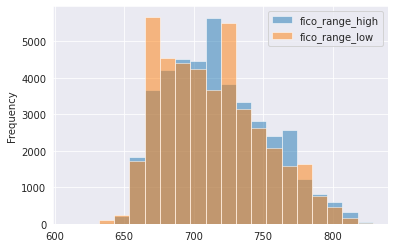

In [ ]:
fico_columns = ['fico_range_high','fico_range_low']
print(loans_2007.shape[0])
loans_2007.dropna(subset=fico_columns,inplace=True)
print(loans_2007.shape[0])
loans_2007[fico_columns].plot.hist(alpha=0.5,bins=20);

Let’s now go ahead and create a column for the average of `fico_range_low` and `fico_range_high` columns and name it `fico_average`. Note that this is not the average FICO score for each borrower, but rather an average of the high and low range that we know the borrower is in.

In [ ]:

loans_2007['fico_average'] = # you code goes here

In [ ]:
cols = ['fico_range_low','fico_range_high','fico_average']
loans_2007[cols].head()

,fico_range_low,fico_range_high,fico_average
0,735.0,739.0,737.0
1,740.0,744.0,742.0
2,735.0,739.0,737.0
3,690.0,694.0,692.0
4,695.0,699.0,697.0


Good! We got the mean calculations and everything right. Now, we can go ahead and drop `fico_range_low`, `fico_range_high`, `last_fico_range_low`, and `last_fico_range_high` columns.

In [ ]:
drop_cols = ['fico_range_low','fico_range_high','last_fico_range_low', 'last_fico_range_high']
# Drop them and print the shape


(42535, 33)

### Decide On A Target Column
Now, we’ll decide on the appropriate column to use as a target column for modeling.

Our main goal is predict who will pay off a loan and who will default, we we need to find a column that reflects this. We learned from the description of columns in the preview DataFrame that `loan_status` is the only field in the main data set that describes a loan status, so let’s use this column as the target column.

In [ ]:
preview[preview.name == 'loan_status']

,name,dtypes,first value,description
16,loan_status,object,Fully Paid,Current status of the loan


In [ ]:
loans_2007[['loan_status']].head()

,loan_status
0,Fully Paid
1,Charged Off
2,Fully Paid
3,Fully Paid
4,Current


Currently, this column contains text values that need to be converted to numerical values to be able use for training a model. Let’s explore the different values in this column and come up with a strategy for converting them. We’ll use the DataFrame method `value_counts()` to return the frequency of the unique values in the `loan_status` column.

In [ ]:
loans_2007["loan_status"].value_counts()

Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

The loan status has nine different possible values! Let’s learn about these unique values to determine the ones that best describe the final outcome of a loan, and also the kind of classification problem we’ll be dealing with.

Below, we’ll pull that data together in a table below so we can see the unique values, their frequency in the data set, and get a clearer idea of what each means:

In [ ]:
meaning = [
"Loan has been fully paid off.",
"Loan for which there is no longer a reasonable expectation of further payments.",
"While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",
"While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",
"Loan is up to date on current payments.",
"The loan is past due but still in the grace period of 15 days.",
"Loan hasn't been paid in 31 to 120 days (late on the current payment).",
"Loan hasn't been paid in 16 to 30 days (late on the current payment).",
"Loan is defaulted on and no payment has been made for more than 121 days."]
status, count = loans_2007["loan_status"].value_counts().index, loans_2007["loan_status"].value_counts().values
loan_statuses_explanation = pd.DataFrame({'Loan Status': status,'Count': count,'Meaning': meaning})[['Loan Status','Count','Meaning']]
loan_statuses_explanation

,Loan Status,Count,Meaning
0,Fully Paid,33586,Loan has been fully paid off.
1,Charged Off,5653,Loan for which there is no longer a reasonable expectation of further payments.
2,Does not meet the credit policy. Status:Fully Paid,1988,"While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace."
3,Does not meet the credit policy. Status:Charged Off,761,"While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace."
4,Current,513,Loan is up to date on current payments.
5,In Grace Period,16,The loan is past due but still in the grace period of 15 days.
6,Late (31-120 days),12,Loan hasn't been paid in 31 to 120 days (late on the current payment).
7,Late (16-30 days),5,Loan hasn't been paid in 16 to 30 days (late on the current payment).
8,Default,1,Loan is defaulted on and no payment has been made for more than 121 days.


Remember, the goald is learn from the past loans to predict which loans will be paid off and which will not.

Therefore, we will keep our eyes only on the samples where the `loan_status` column is `'Fully Paid'` or `'Charged Off'`.

We’re not interested in any statuses that indicate that the loan is ongoing or in progress, because predicting that something is in progress doesn’t tell us anything.

In [ ]:
# Now, you should keep only instances with loan_status equals to "Fully Paid" or "Charged off". Any other instances should be deleted.


# Good, You are proceeding!
# It is always easier to work with numbers than text. There, could you please replace the values of "loan_status" as specified in mapping_dictionary
mapping_dictionary = {"loan_status":{ "Fully Paid": 1, "Charged Off": 0}}



## Visualizing the Target Column Outcomes

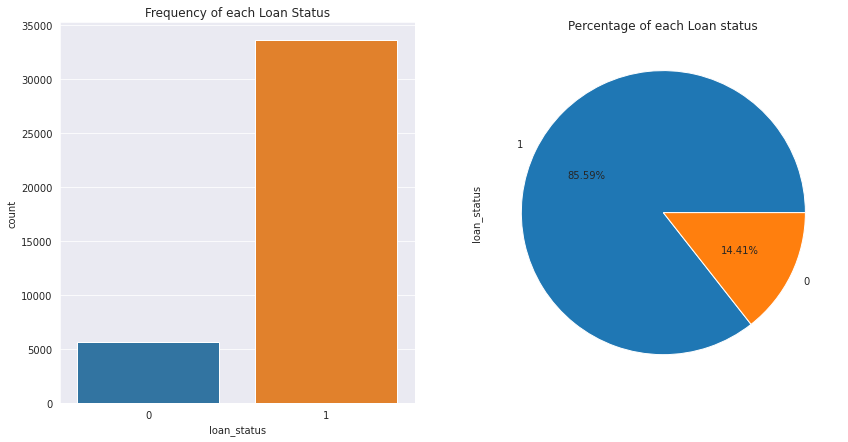

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='loan_status',data=loans_2007,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
loans_2007.loan_status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()

These plots indicate that a significant number of borrowers in our data set paid off their loan — 85.59% of loan borrowers paid off amount borrowed, while 14.41% unfortunately defaulted. It is these ‘defaulters’ that we’re more interested identifying, since for the purposes of our model we’re trying to find a way to maximize investment returns.

Not lending to these defaulters would help increase our returns, so we’ll continue cleaning our data with an eye towards building a model that can identify likely defaulters at the point of application.

## Remove Columns with only One Value

To wrap up this section, let’s look for any columns that contain only one unique value and remove them. These columns won’t be useful for the model since they don’t add any information to each loan application. In addition, removing these columns will reduce the number of columns we’ll need to explore further in the next stage.

The pandas Series method nunique() returns the number of unique values, excluding any null values. We can use apply this method across the data set to remove these columns in one easy step.

In [ ]:
loans_2007 = loans_2007.loc[:,loans_2007.apply(pd.Series.nunique) != 1]

For the documentation of the function ``loc`` and ``apply``, how does the privous line deletes columns (features) with single unique value?

Answer: ...

Again, there may be some columns with more than one unique value, but one value that has insignificant frequency in the data set. Let’s find and drop any columns with unique values that appear fewer than four times:

In [ ]:
for col in loans_2007.columns:
    if (len(loans_2007[col].unique()) < 4):
      print(loans_2007[col].value_counts())
      print()

 36 months    29096
 60 months    10143
Name: term, dtype: int64

Not Verified       16845
Verified           12526
Source Verified     9868
Name: verification_status, dtype: int64

1    33586
0     5653
Name: loan_status, dtype: int64

n    39238
y        1
Name: pymnt_plan, dtype: int64



The payment plan column (pymnt_plan) has two unique values, 'y' and 'n', with 'y' occurring only once. Let’s drop this column:

In [ ]:
print(loans_2007.shape[1])
loans_2007 = loans_2007.drop('pymnt_plan', axis=1)
print("We've been able to reduce the features to => {}".format(loans_2007.shape[1]))

25
We've been able to reduce the features to => 24


Lastly, let’s use pandas to save our freshly-cleaned DataFrame as a CSV file:

In [ ]:
loans_2007.to_csv(data_folder + "filtered_loans_2007.csv",index=False)

Now we’ve got a much better data set to work with. But we’re still not done with our data cleaning work, so let’s keep at it!

# Preparing the features for Machine Learning

In this section, we’ll prepare the filtered_loans_2007.csv data for machine learning. We’ll focus on handling missing values, converting categorical columns to numeric columns and removing any other extraneous columns.

We need to **handle missing values and categorical features** before feeding the data into a machine learning algorithm, because the mathematics underlying most machine learning models assumes that the data is numerical and contains no missing values. To reinforce this requirement, scikit-learn will return an error if you try to train a model using data that contain missing values or non-numeric values when working with models like linear regression and logistic regression.

Here’s an outline of what we’ll be doing in this stage:

* Handle Missing Values
* Investigate Categorical Columns
> * Convert Categorical Columns To Numeric Features
>> * Map Ordinal Values To Integers
   * Encode Nominal Values As Dummy Variables

First though, let’s load in the data from last section’s final output:

In [ ]:
filtered_loans = pd.read_csv(data_folder + 'filtered_loans_2007.csv')
print(filtered_loans.shape)
filtered_loans.head()

(39239, 24)


,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies,fico_average
0,5000.0,36 months,162.87,B,10+ years,RENT,24000.0,Verified,1,credit_card,Computer,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,Sep-2016,0.0,737.0
1,2500.0,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,0,car,bike,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,Sep-2016,0.0,742.0
2,2400.0,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,1,small_business,real estate business,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,Sep-2016,0.0,737.0
3,10000.0,36 months,339.31,C,10+ years,RENT,49200.0,Source Verified,1,other,personel,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,Apr-2016,0.0,692.0
4,5000.0,36 months,156.46,A,3 years,RENT,36000.0,Source Verified,1,wedding,My wedding loan I promise to pay back,AZ,11.20,0.0,Nov-2004,3.0,9.0,0.0,7963.0,28.3%,12.0,Jan-2016,0.0,732.0


## Handle Missing Values

Let’s compute the number of missing values and determine how to handle them. We can return the number of missing values across the DataFrame like this:

* First, use the Pandas DataFrame method isnull() to return a DataFrame containing Boolean values:
> * True if the original value is null
  * False if the original value isn’t null
* Then, use the Pandas DataFrame method sum() to calculate the number of null values in each column.

In [ ]:
null_counts = # your code goes here!
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
loan_amnt                  0
term                       0
installment                0
grade                      0
emp_length              1057
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
title                     11
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
last_credit_pull_d         2
pub_rec_bankruptcies     697
fico_average               0
dtype: int64


Notice while most of the columns have 0 missing values, `title` has 9 missing values, `revol_util` has 48, and `pub_rec_bankruptcies` contains 675 rows with missing values.

Let’s remove columns entirely where more than 1% (392) of the rows for that column contain a null value. In addition, we’ll remove the remaining rows containing null values. This means we’ll lose a bit of data, but in return keep some extra features to use for prediction (since we won’t have to drop those columns).

We’ll keep the `title` and `revol_util` columns, just removing rows containing missing values, but drop the `pub_rec_bankruptcies` column entirely since more than 1% of the rows have a missing value for this column.

Specifically, here’s what we’re going to do:

* Use the drop method to remove the pub_rec_bankruptcies column from filtered_loans.
* Use the dropna method to remove all rows from filtered_loans containing any missing values.

And here’s how that looks in code.

In [ ]:
filtered_loans = # line code 1
filtered_loans = # line code 2

There are seveal ways to handle null values. We have just droped the rows that have null values here. But keep in your mind that you can impute missing  values.

We will not discuss how to do impute them here, however you can read about 'Null values imputation' yourself.

### Investigate Categorical Columns

Our goal here is to end up with a data set that’s ready for machine learning, meaning that it contains no missing values and that all values in columns are numeric (float or int data type).

We dealt with the missing values already, so let’s now find out the number of columns that are of the object data type and figure out how we can make those values numeric.

In [ ]:
# Print the features' data types and and how many features are under each of them.
print("Data types and their frequency\n{}".format(# you code goes here))

Data types and their frequency
float64    11
object     11
int64       1
dtype: int64


We have 11 object columns that contain text which need to be converted into numeric features. Let’s select just the object columns using the DataFrame method `select_dtype`, then display a sample row to get a better sense of how the values in each column are formatted.

In [ ]:
# the sample could be a single value of each feature
object_columns_df = # you code goes here!
print(object_columns_df.iloc[0])

term                     36 months
grade                            B
emp_length               10+ years
home_ownership                RENT
verification_status       Verified
purpose                credit_card
title                     Computer
addr_state                      AZ
earliest_cr_line          Jan-1985
revol_util                   83.7%
last_credit_pull_d        Sep-2016
Name: 0, dtype: object


Notice that `revol_util` column contains numeric values, but is formatted as object. We learned from the description of columns in the `preview` DataFrame earlier that `revol_util` is a “revolving line utilization rate or the amount of credit the borrower is using relative to all available credit” (read more here). We need to format `revol_util` as a numeric value. Here’s what we can do:

Use the `str.rstrip()` string method to strip the right trailing percent sign (%).
On the resulting Series object, use the `astype()` method to convert to the type float.
Assign the new Series of float values back to the `revol_util` column in the `filtered_loans`.

In [ ]:
filtered_loans['revol_util'] = # your code goes here!

Moving on, these columns seem to represent categorical values:

* `home_ownership` — home ownership status, can only be 1 of 4 categorical values according to the data dictionary.
* `verification_status` — indicates if income was verified by LendingClub.
* `emp_length` — number of years the borrower was employed upon time of application.
* `term` — number of payments on the loan, either 36 or 60.
* `addr_state` — borrower’s state of residence.
* `grade` — LC assigned loan grade based on credit score.
* `purpose` — a category provided by the borrower for the loan request.
* `title` — loan title provided the borrower.

To be sure, lets confirm by checking the number of unique values in each of them.

Also, based on the first row’s values for `purpose` and `title`, it appears these two columns reflect the same information. We’ll explore their unique value counts separately to confirm if this is true.

Lastly, notice the first row’s values for both `earliest_cr_line` and last_credit_pull_d columns contain date values that would require a good amount of feature engineering for them to be potentially useful:

* `earliest_cr_line` — The month the borrower’s earliest reported credit line was opened.
* `last_credit_pull_d` — The most recent month LendingClub pulled credit for this loan.

For some analyses, doing this feature engineering might well be worth it, but for the purposes of this tutorial we’ll just remove these date columns from the DataFrame.

First, let’s explore the unique value counts of the six columns that seem like they contain categorical values:

In [ ]:
cols = ['home_ownership', 'grade','verification_status', 'emp_length', 'term', 'addr_state']
for name in cols:
    print(name,':')
    print(object_columns_df[name].value_counts(),'\n')

home_ownership :
RENT        18271
MORTGAGE    16945
OWN          2808
OTHER          96
NONE            3
Name: home_ownership, dtype: int64 

grade :
B    11545
A     9675
C     7801
D     5086
E     2715
F      993
G      308
Name: grade, dtype: int64 

verification_status :
Not Verified       16391
Verified           12070
Source Verified     9662
Name: verification_status, dtype: int64 

emp_length :
10+ years    8715
< 1 year     4542
2 years      4344
3 years      4050
4 years      3385
5 years      3243
1 year       3207
6 years      2198
7 years      1738
8 years      1457
9 years      1244
Name: emp_length, dtype: int64 

term :
 36 months    28234
 60 months     9889
Name: term, dtype: int64 

addr_state :
CA    6833
NY    3657
FL    2741
TX    2639
NJ    1802
IL    1476
PA    1460
VA    1359
GA    1340
MA    1292
OH    1167
MD    1020
AZ     819
WA     796
CO     755
NC     747
CT     719
MI     684
MO     653
MN     586
NV     473
SC     461
WI     433
OR     427
AL     42

Most of these columns contain discrete categorical values which we can encode as dummy variables and keep. The `addr_state` column, however, contains too many unique values, so it’s better to drop this.

Next, let’s look at the unique value counts for the `purpose` and title columns to understand which columns we want to keep.

In [ ]:
for name in ['purpose','title']:
  print("Unique Values in column: {}\n".format(name))
  print(filtered_loans[name].value_counts(),'\n')

Unique Values in column: purpose

debt_consolidation    17965
credit_card            4944
other                  3764
home_improvement       2852
major_purchase         2105
small_business         1749
car                    1483
wedding                 927
medical                 663
moving                  556
house                   359
vacation                349
educational             312
renewable_energy         95
Name: purpose, dtype: int64 

Unique Values in column: title

Debt Consolidation                 2102
Debt Consolidation Loan            1635
Personal Loan                       632
Consolidation                       495
debt consolidation                  476
                                   ... 
Investment in Daughter's Future       1
NJC Loan                              1
Finally getting Debt Free             1
December 2010 Loan                    1
car repair loan                       1
Name: title, Length: 19021, dtype: int64 



It appears the `purpose` and `title` columns do contain overlapping information, but the purpose column contains fewer discrete values and is cleaner, so we’ll keep it and drop `title`.

Lets drop the columns we’ve decided not to keep so far:

In [ ]:
drop_cols = ['last_credit_pull_d','addr_state','title','earliest_cr_line']
filtered_loans = filtered_loans.drop(drop_cols,axis=1)

## Convert Categorical Columns to Numeric Features

First, let’s understand the two types of categorical features we have in our dataset and how we can convert each to numerical features:

* Ordinal values: these categorical values are in natural order. We can sort or order them either in increasing or decreasing order. For instance, we learned earlier that LendingClub grades loan applicants from A to G, and assigns each applicant a corresponding interest rate – grade A is least risky, grade B is riskier than A, and so on:

``
A < B < C < D < E < F < G ; where < means less risky than
``

* Nominal Values: these are regular categorical values. You can’t order nominal values. For instance, while we can order loan applicants in the employment length column (`emp_length`) based on years spent in the workforce:

``
year 1 < year 2 < year 3 … < year N,
``

we can’t do that with the column `purpose`. It wouldn’t make sense to say:

``
car < wedding < education < moving < house
``

These are the columns we now have in our dataset:

* Ordinal Values
>* grade
 * emp_length
* Nominal Values _ `home_ownership`
>* verification_status
 * purpose
 * term

There are different approaches to handle each of these two types. To map the ordinal values to integers, we can use the pandas DataFrame method `replace()` to map both `grade` and `emp_length` to appropriate numeric values:

In [ ]:
mapping_dict = {
"emp_length": {
"10+ years": 10,
"9 years": 9,
"8 years": 8,
"7 years": 7,
"6 years": 6,
"5 years": 5,
"4 years": 4,
"3 years": 3,
"2 years": 2,
"1 year": 1,
"< 1 year": 0,
"n/a": 0
},
"grade":{
"A": 1,
"B": 2,
"C": 3,
"D": 4,
"E": 5,
"F": 6,
"G": 7
}
}
# you code goes here!

filtered_loans[['emp_length','grade']].head()

,emp_length,grade
0,10,2
1,0,3
2,10,3
3,10,3
4,3,1


Perfect! Let’s move on to the Nominal Values. Converting nominal features into numerical features requires encoding them as dummy variables. The process will be:

* Use pandas’ `get_dummies()` method to return a new DataFrame containing a new column for each dummy variable.
* Use the `concat()` method to add these dummy columns back to the original DataFrame.
* Drop the original columns entirely using the drop method.

Let’s go ahead and encode the nominal columns that we have in our data set:

In [ ]:
nominal_columns = ["home_ownership", "verification_status", "purpose", "term"]
dummy_df = # your code goes here!
filtered_loans = # add dummy_df to filtered loans
filtered_loans = # drop the original columns

In [ ]:
filtered_loans.head()

,loan_amnt,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,fico_average,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,5000.0,162.87,2,10,24000.0,1,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,737.0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2500.0,59.83,3,0,30000.0,0,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,742.0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2400.0,84.33,3,10,12252.0,1,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,737.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,10000.0,339.31,3,10,49200.0,1,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,692.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,5000.0,156.46,1,3,36000.0,1,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,732.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


To wrap things up, let’s inspect our final output from this section to make sure all the features are of the same length, contain no null value, and are numerical. We’ll use pandas’s info method to inspect the filtered_loans DataFrame:

In [ ]:
filtered_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38123 entries, 0 to 39238
Data columns (total 39 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            38123 non-null  float64
 1   installment                          38123 non-null  float64
 2   grade                                38123 non-null  int64  
 3   emp_length                           38123 non-null  int64  
 4   annual_inc                           38123 non-null  float64
 5   loan_status                          38123 non-null  int64  
 6   dti                                  38123 non-null  float64
 7   delinq_2yrs                          38123 non-null  float64
 8   inq_last_6mths                       38123 non-null  float64
 9   open_acc                             38123 non-null  float64
 10  pub_rec                              38123 non-null  float64
 11  revol_bal                   

That all looks good! Congratulations, we’ve just cleaned a large data set for machine learning, and added some valuable data cleaning skills to our repertoire in the process.

There’s still an important final task we need to complete, though!

# Save to CSV

It is a good practice to store the final output of each section or stage of your workflow in a separate csv file. One of the benefits of this practice is that it helps us to make changes in our data processing flow without having to recalculate everything.

As we did previously, we can store our DataFrame as a CSV using the handy pandas `to_csv()` function.

In [ ]:
filtered_loans.to_csv(data_folder + "cleaned_loans_2007.csv",index=False)